In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
column_names=df.columns
for column in column_names:
    new_name=column.replace(" ","_")
    df.rename(columns={column:new_name},inplace=True)

In [5]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
df.describe(include="all")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.001000,69.195000,68.119000
std,NaN,NaN,NaN,NaN,NaN,15.569567,14.706436,15.226381
min,NaN,NaN,NaN,NaN,NaN,0.000000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,59.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,66.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.250000,79.000000


In [8]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Find out how many males and females participated in the test.


In [9]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# 
518 females and 482 males participated in this test

# What do you think about the students' parental level of education?


In [10]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

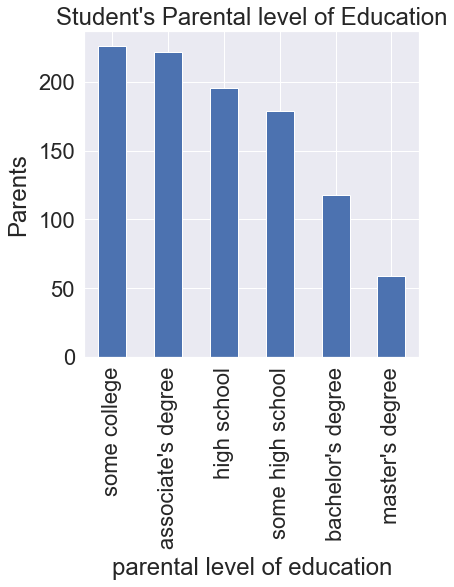

In [11]:
sns.set(font_scale=2)
df['parental_level_of_education'].value_counts().plot(kind='bar', figsize=(6,6))
plt.xlabel("parental level of education",labelpad=8)
plt.ylabel("Parents",labelpad=8)
plt.title("Student's Parental level of Education");


# 
59 of them have masters degree, and most of them have college education.

# Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course


In [12]:
df.groupby('gender')['reading_score'].mean()

gender
female    72.590734
male      65.545643
Name: reading_score, dtype: float64

#
based on gender males scores the most for reading

In [13]:
df.groupby('gender')['math_score'].mean()

gender
female    63.376448
male      68.821577
Name: math_score, dtype: float64

# 
based on gender males scores the most for maths

In [14]:
df.groupby('gender')['writing_score'].mean()

gender
female    72.467181
male      63.446058
Name: writing_score, dtype: float64

# 
based on gender females scores the most for writing

In [15]:
df.groupby('test_preparation_course')['math_score'].mean()

test_preparation_course
completed    69.96648
none         63.78972
Name: math_score, dtype: float64

#
based on test preparation math score completed


In [16]:
df.groupby('test_preparation_course')['reading_score'].mean()

test_preparation_course
completed    74.175978
none         66.417445
Name: reading_score, dtype: float64

# 
based on test preparation reading score completed

In [17]:
df.groupby('test_preparation_course')['writing_score'].mean()

test_preparation_course
completed    74.684358
none         64.457944
Name: writing_score, dtype: float64

# 
based on test preparation writing score completed

In [18]:
#summary of values 
df.groupby('gender')['math_score','writing_score',"reading_score"].mean()

,math_score,writing_score,reading_score
gender,,,
female,63.376448,72.467181,72.590734
male,68.821577,63.446058,65.545643


In [19]:
df.groupby('test_preparation_course')['math_score','writing_score',"reading_score"].mean()

,math_score,writing_score,reading_score
test_preparation_course,,,
completed,69.96648,74.684358,74.175978
none,63.78972,64.457944,66.417445


# What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [20]:
df.groupby('gender')['math_score','writing_score',"reading_score"].std()

,math_score,writing_score,reading_score
gender,,,
female,16.029928,14.844842,14.411018
male,14.556411,14.227225,14.149594


In [21]:
df.groupby('test_preparation_course')['math_score','writing_score',"reading_score"].std()

,math_score,writing_score,reading_score
test_preparation_course,,,
completed,14.521847,13.236412,13.537572
none,15.705689,15.041667,14.608896


<AxesSubplot:xlabel='gender', ylabel='math_score'>

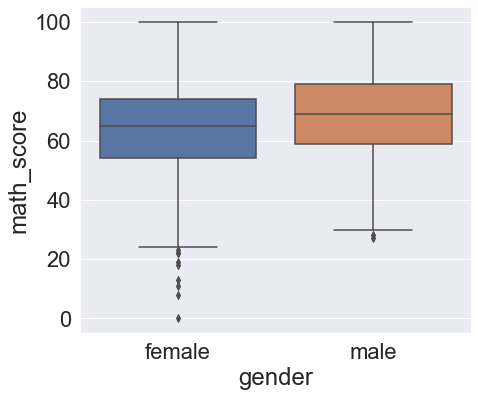

In [40]:
plt.figure(figsize=(7,6))
sns.boxplot(x="gender", y="math_score", data=df)

<AxesSubplot:xlabel='gender', ylabel='writing_score'>

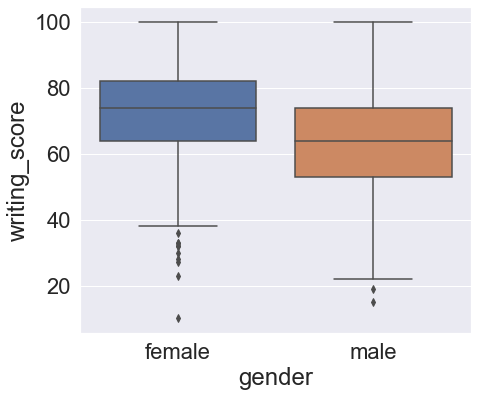

In [26]:
plt.figure(figsize=(7,6))
sns.boxplot(x="gender", y="writing_score", data=df)

<AxesSubplot:xlabel='gender', ylabel='reading_score'>

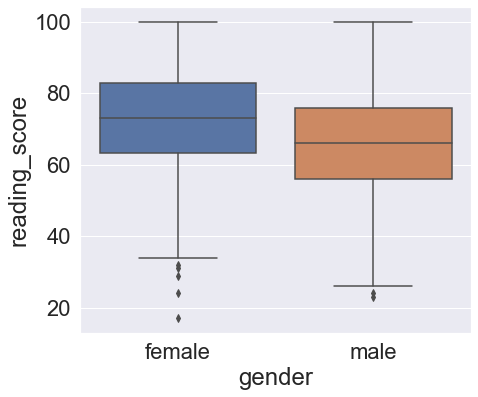

In [25]:
plt.figure(figsize=(7,6))
sns.boxplot(x="gender", y="reading_score", data=df)

<AxesSubplot:xlabel='test_preparation_course', ylabel='math_score'>

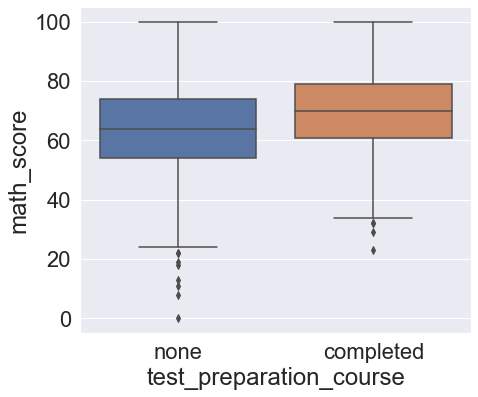

In [28]:
plt.figure(figsize=(7,6))
sns.boxplot(x="test_preparation_course", y="math_score", data=df)

<AxesSubplot:xlabel='test_preparation_course', ylabel='writing_score'>

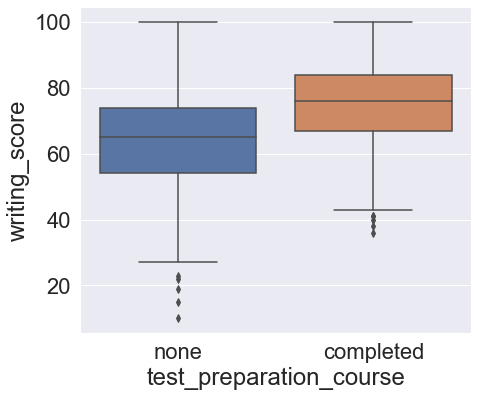

In [29]:
plt.figure(figsize=(7,6))
sns.boxplot(x="test_preparation_course", y="writing_score", data=df)

<AxesSubplot:xlabel='test_preparation_course', ylabel='reading_score'>

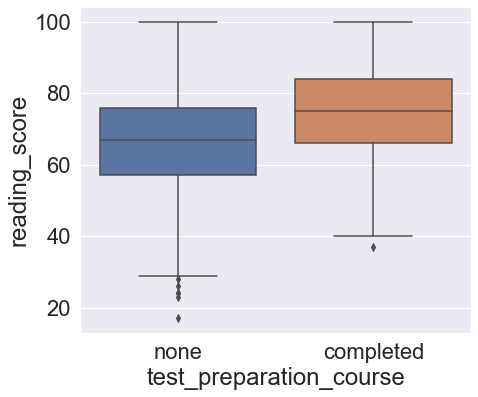

In [30]:
plt.figure(figsize=(7,6))
sns.boxplot(x="test_preparation_course", y="reading_score", data=df)

In [47]:
#from the above boxplots scoring variation for math, reading and writing can be indentified

# The management needs your help to give bonus points to the top 25% ofstudents based on their maths score, so how will you help the managementto achieve this.


In [44]:
bonus=df.sort_values(by=['math_score'],ascending=False).head(250)
bonus
bonus.loc[: ,['gender','math_score']]

,gender,math_score
999,male,100
996,male,100
515,female,100
517,female,100
516,female,100
...,...,...
856,male,77
855,male,77
854,male,77
853,male,77


# 
score of top 25% students 